In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import csv  
import pandas as pd
import copy

In [2]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
import easyocr

In [12]:
def apply_opening(binary_image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
    return opened_image

In [13]:
def apply_closing(binary_image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
    return closed_image

In [14]:
def ocr1(source,directory,file):
    IMAGE_PATH = source+'/'+directory+'/'+file
    img = cv2.imread(IMAGE_PATH)
    
    img = apply_opening(img,3)
    
    # Create clahe:
    clahe = cv2.createCLAHE(clipLimit=2.0)
    # Apply CLAHE to the grayscale image varying clipLimit parameter:
    img = clahe.apply(img)
    
    roi_name = (550, 1196, 1050, 3000)
    roi_seat = (250, 1196, 400, 3000)
    roi_roll = (450, 1196, 570, 3000)

    # Crop the image based on ROI coordinates
    name_crop = img[roi_name[1]:roi_name[3], roi_name[0]:roi_name[2]]
    seat_crop = img[roi_seat[1]:roi_seat[3], roi_seat[0]:roi_seat[2]]
    roll_crop = img[roi_roll[1]:roi_roll[3], roi_roll[0]:roi_roll[2]]  
    
    reader = easyocr.Reader(['en'])
    result = reader.readtext(name_crop,paragraph="False")
    s1 = pd.Series([l[1] for l in result])
    filter_x = (s1.str.contains(r'[A-Za-z]')) & (s1.str.len() > 4)
    s1[filter_x].reset_index(drop=True)
    list1 = s1[filter_x].reset_index(drop=True).tolist()
    
    
#     reader = easyocr.Reader(['en'])
#     result = reader.readtext(name_crop,paragraph="False")
#     s1 = pd.Series([l[1] for l in result])
#     s1 = s1.astype(str)
#     filter_x = (s1.str.contains(r'[A-Za-z]')) & (s1.str.len() > 4)
#     s1[filter_x].reset_index(drop=True)
#     list1 = s1[filter_x].reset_index(drop=True).tolist()
    
    result1 = reader.readtext(seat_crop,paragraph="False")
    result2 = reader.readtext(roll_crop,paragraph="False")

    cv2.imwrite('temp/rough/'+file+"1.jpg", name_crop)
    cv2.imwrite('temp/rough/'+file+"2.jpg", seat_crop)
    cv2.imwrite('temp/rough/'+file+"3.jpg", roll_crop)
    
    # Display the binary images
    plt.subplot(131)
    plt.imshow(name_crop, cmap='gray')
    plt.title("Name Crop")
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(seat_crop, cmap='gray')
    plt.title("Seat Crop")
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(roll_crop, cmap='gray')
    plt.title("Roll Crop")
    plt.axis('off')

    plt.show()

    data=[]
    files = os.path.splitext(file)
    
    max_length = max(len(result1), len(result2), len(result))
    for i in range(max_length):
        a=[directory,files[0]]
        if i <= len(result1) - 1:
            a.append(result1[i][1])
        else:
            a.append(None)

        if i <= len(result2) - 1:
            a.append(result2[i][1])
        else:
            a.append(None)

        if i <= len(result) - 1:
            a.append(result[i][1])
        else:
            a.append(None)

        data.append(a)
    print("Written:", directory, files[0],len(result),len(result1), len(result2))
    return data


In [15]:
def csv_writter1(data):
   # fields = ['Department', 'FileNo', 'Candidiate']

   # name of csv file 
    filename = r"C:\Users\hpcc\Desktop\OCR\Destrecord.csv"
    
    # writing to csv file 
    with open(filename, 'a') as csvfile: 
        
        # creating a csv writer object 
        csvwriter = csv.writer(csvfile) 
        # writing the fields 
       # csvwriter.writerow(fields)         
        # writing the data rows 
        csvwriter.writerows(data)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


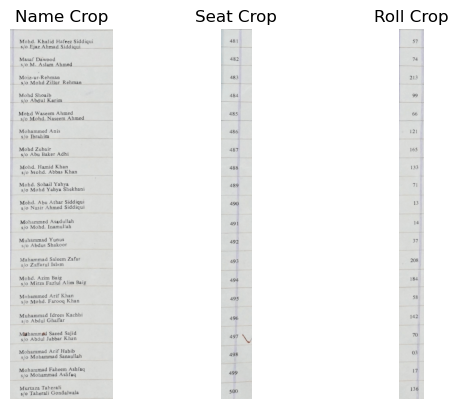

Written: CIS 9984-1 20 20 20
Data: [['CIS', '9984-1', '48 [', '57', 'Mohd Khalid Haleez Siddiqui s/o Ejaz Ahmad Siddiqui'], ['CIS', '9984-1', '482', '74', 'Masal Dawood s/oM Aslam Ahmed'], ['CIS', '9984-1', '483', '213', 'Moiz-ur-Rehman s/o Mohd Zillur_Rehman'], ['CIS', '9984-1', '484', '99', 'Mohd Shoaib s/o Abdul Karim'], ['CIS', '9984-1', '485', '66', 'Mohd Waseem Ahmed s/o_Mohd  Naseem Ahmed'], ['CIS', '9984-1', '486', '121', 'Mohammed Anis s/o Ibrahim'], ['CIS', '9984-1', '487', '165', 'Mohd Zubair s/o Abu Baker Adhi'], ['CIS', '9984-1', '488', '133', 'Mohd Hamid Khan s/o Mohd Abbas Khan'], ['CIS', '9984-1', '489', '71', 'Mohd Sohail Yahya s/o Mohd Yahya Shekhani'], ['CIS', '9984-1', '490', '13', 'Mohd. Abu Athar Siddiqui /0 Nasir Ahmed Siddiqui'], ['CIS', '9984-1', '491', '14', 'Mohammed Asadullah s/o Mohd_ Inamullah'], ['CIS', '9984-1', '492', '37', 'Muhammad Yunus s/o Abdus Shakoor'], ['CIS', '9984-1', '493', '208', 'Mahammad Saleem Zifar s/o Zaffarul Islam'], ['CIS', '9984-1',

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


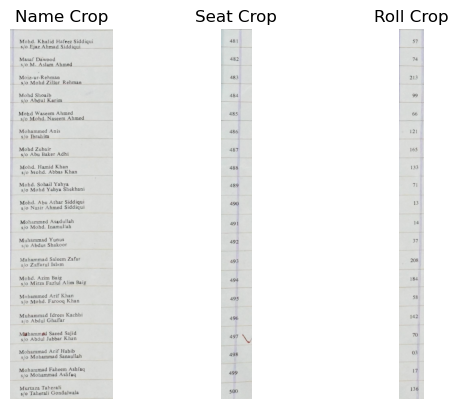

Written: CIS 9984 20 20 20
Data: [['CIS', '9984', '48 [', '57', 'Mohd Khalid Haleez Siddiqui s/o Ejaz Ahmad Siddiqui'], ['CIS', '9984', '482', '74', 'Masal Dawood s/o M.Aslam Ahmed'], ['CIS', '9984', '483', '213', 'Moiz-ur-Rehmin s/o Mohd Zillur_Rehman'], ['CIS', '9984', '484', '99', 'Mohd Shoaib s/o Abdul Karim'], ['CIS', '9984', '485', '66', 'Mohd Waseem Ahmed s/o_Mohd  Naseem Ahmed'], ['CIS', '9984', '486', '121', 'Mohammed Anis s/o Ibrahim'], ['CIS', '9984', '487', '165', 'Mohd Zubair s/o Abu Baker Adhi'], ['CIS', '9984', '488', '133', 'Mohd. Hamid Khan s/o Mohd Abbas Khan'], ['CIS', '9984', '489', '71', 'Mohd Sohail Yahya s/o Mohd Yabya Shekhani'], ['CIS', '9984', '490', '13', 'Mohd: Abu Athar Siddiqui /0 Nasir Ahmed Siddiqui'], ['CIS', '9984', '491', '14', 'Mohammed Asadullah s/o Mohd: Inamullah'], ['CIS', '9984', '492', '37', 'Muhammad Yunus /o Abdus Shakoor'], ['CIS', '9984', '493', '208', 'Mahammad Saleem Zifar s/o Zaffarul Islam'], ['CIS', '9984', '494', '184', 'Mobd; Azim Ba

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


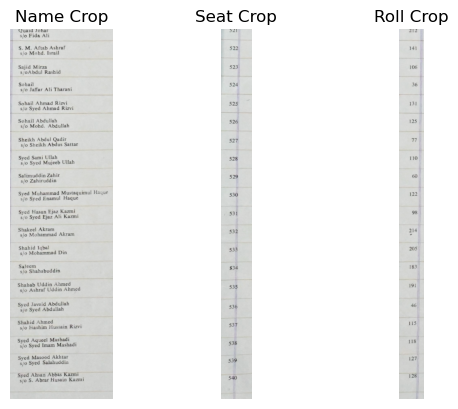

Written: CIS 9986 20 20 20
Data: [['CIS', '9986', 'D2', '2_', 'Quaid Jonar /o Fida Ali'], ['CIS', '9986', '522', '141', 'S. M. Aftab Ashraf s/o Mohd Israil'], ['CIS', '9986', '523', '106', 'Sajid Mirza /oA bdul Rashid'], ['CIS', '9986', '524', '36', 'Sobail s/o Jaflar Ali Tharani'], ['CIS', '9986', '525', '13[', 'Sohail Ahmad Rizvi s/o Syed Ahmad Rizvi'], ['CIS', '9986', '526', '125', 'Sohail Abdullah s/o Mohd. Abdullah'], ['CIS', '9986', '527', '77', 'Sheikh Abdul Qadir s/o Sheikh Abdus Sattar'], ['CIS', '9986', '528', '110', 'Syed Sami Ullah s/o Syed Mujeeb Ullah'], ['CIS', '9986', '529', '60', 'Salimuddin Zahir s/o Zahiruddin'], ['CIS', '9986', '530', '122', 'Syed Muhammad Mustaquimul Haque s/o Syed Enamul Haque'], ['CIS', '9986', '53', '98', 'Syed Hasan Ejaz Kazmi s/o Syed Ejaz Ali Kazmi'], ['CIS', '9986', '532', '214', 'Shakeel Akram s/o Mohammad Akram'], ['CIS', '9986', '533', '205', 'Shahid Iqbal s/o Mohammad Din'], ['CIS', '9986', '534', '183', 'Salecm s/o Shahabuddin'], ['CIS'

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


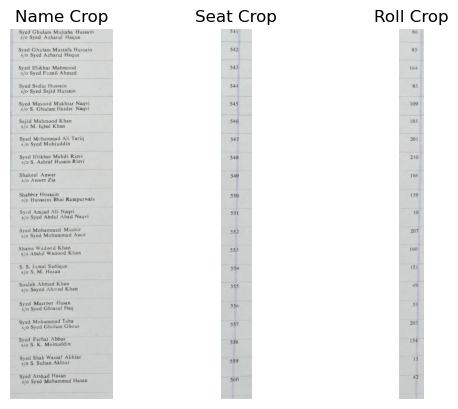

Written: CIS 9987 20 20 19
Data: [['CIS', '9987', '541', '86', 'Syed Ghulam Mujtaba Hussain s/o Syed Azharul Haque'], ['CIS', '9987', '542', '85', 'Syed Ghulam Mustafa Hussain /0 Syed Azharul Haque'], ['CIS', '9987', '543', '164', 'Syed Mtikhar Mahmood s/o Syed Fozail Ahmed'], ['CIS', '9987', '54', '93', 'Syed Sadiq Hussain s/o Syed Sujid Hussain'], ['CIS', '9987', '545', '109', 'Syed Masood Mukhtar Naqvi Jo S Ghulam Haider Naqvi'], ['CIS', '9987', '546', '185', 'Sujid Mahmood Khan s/o M. Iqbal Khan'], ['CIS', '9987', '547', '201', "Syed Mohammad Ali Tariq '/0 Syed Mohiuddin"], ['CIS', '9987', '548', '210', 'Syed Iftikhar Mehdi Rizvi s/o S. Ashraf Husain Rizvi'], ['CIS', '9987', '549', '166', 'Shakeel Anwer lo Anwer Zia'], ['CIS', '9987', '550', '159', 'Shabbir Hussain s/o Hussaini Bhai Rampurwala'], ['CIS', '9987', '551', '10', 'Syed Amjad Ali Naqvi s/o Syed Abdul Ahad Naqvi'], ['CIS', '9987', '552', '207', 'Syed Mohammed Mushir s/o Syed Mohammad Amir'], ['CIS', '9987', '553', '160', 

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


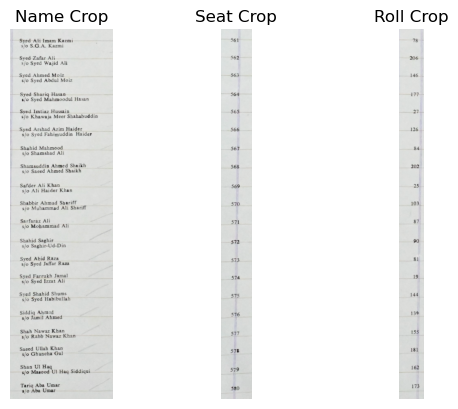

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Written: CIS 9988 20 20 20
Data: [['CIS', '9988', '561', '78', 'Syed Ali Imam Kazmi s/o S.G.A Kazmi'], ['CIS', '9988', '562', '206', 'Syed Zafar Ali S/o Syed Wajid Ali'], ['CIS', '9988', '56}', '146', 'Syed Ahmed Moiz s/o Syed Abdul Moiz'], ['CIS', '9988', '564', '177', "Syed Shariq Hasan '/o Syed Mahmoodul Hasan"], ['CIS', '9988', '565', '27', 'Syed Imtiaz Hussain s/o Khawaja Meer Shahbabuddin'], ['CIS', '9988', '566', '126', 'Syed Arshad Azim Haider s/o Syed Fahimuddin Haider'], ['CIS', '9988', '567', '84', 'Shahid Mahmood s/o Shamshad Ali'], ['CIS', '9988', '568', '202', 'Shamsuddin Ahmed Shaikh s/o Saeed Ahmed Shaikh'], ['CIS', '9988', '569', '25', 'Safder Ali Khan s/o Ali Haider Khan'], ['CIS', '9988', '570', '103', 'Shabbir Ahmad Shariff sjo Muhammad Ali Sharifl'], ['CIS', '9988', '571', '87', 'Sarfaraz Ali s/o Mohammad Ali'], ['CIS', '9988', '572', '90', 'Shahid Saghir s/o Saghir-Ud-Din'], ['CIS', '9988', '573', '81', 'Syed Abid Raza sfo Syed JafTfar Raza'], ['CIS', '9988', '574

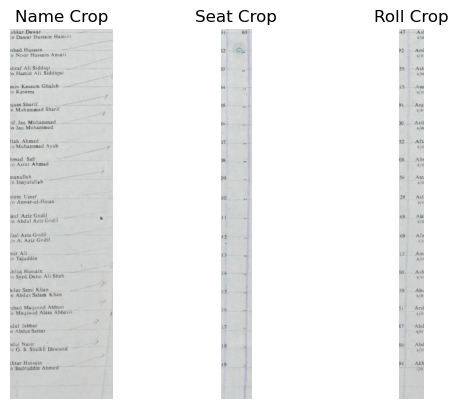

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Written: Mechnical 9980 19 18 33
Data: [['Mechnical', '9980', ') [', '47', 'shkar Dawar (0 Dawar Hussain Hamiai'], ['Mechnical', '9980', '80', 'As', 'Tshad Hussain 0 Noor Hussain Ansari'], ['Mechnical', '9980', '2', '92', 'shraf Ali Siddiqi (0 Hamid Ali Siddiqui'], ['Mechnical', '9980', ')3', 'Arsh S/0', 'min Kaseem Ghaleb l0 Kaseem'], ['Mechnical', '9980', ') 4', '55', 'Ijum Sharil 0 Mohamoad Sharif'], ['Mechnical', '9980', ')5', 'Ash s/o', 'if Jan Mohammad (0 Jan Mohammad'], ['Mechnical', '9980', ')6', '15', '[tab Ahmed Jo Mubammad Ayub'], ['Mechnical', '9980', '17', 'Am s/o', 'hmad Safi /0 Asrar Ahmad'], ['Mechnical', '9980', '18', '91', 'manullah /0 Inayatullah'], ['Mechnical', '9980', '09', 'Anj s/o', 'slam Umer /0 Anwar-ul-Hasan'], ['Mechnical', '9980', '10', 'Jo', 'Ita f Aziz Godil /o Abdul Aziz Godil'], ['Mechnical', '9980', '13', 'Aril s/o', 'Izal Aziz Godil /o Aj Aziz Godil'], ['Mechnical', '9980', '14', '52', 'mir Ali (0 Tajuddin'], ['Mechnical', '9980', '15', 'Aft s/o', "hf

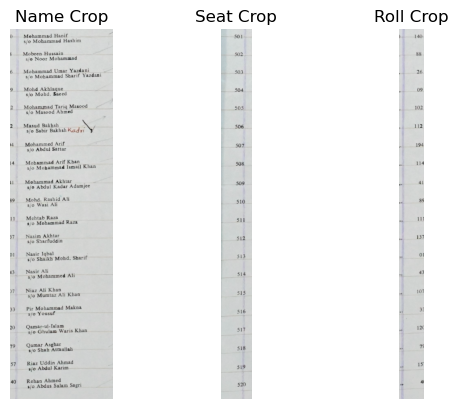

Written: Mechnical 9985 33 20 10
Data: [['Mechnical', '9985', '50 [', '140', 'Mohammad Hanif s/o Mohammad Hashim'], ['Mechnical', '9985', '502', '88', 'Mobeen Hussain s/o Noor Mohammad'], ['Mechnical', '9985', '503', '26', 'Mobammad Umar Yazdani s/o Mohammad Sharif Yazdani'], ['Mechnical', '9985', '504', '09', 'Mobd Akhlaque /o Mohd_ Saeed'], ['Mechnical', '9985', '505', '102', 'Mohammad Tariq Matood s/0 Masood Ahmed'], ['Mechnical', '9985', '506', '12', '2'], ['Mechnical', '9985', '507', '194', 'Masud Bakhsh s/0 Sabir Bakhsh Kadri'], ['Mechnical', '9985', '508', '10', 'Mohammed Arif s/o Abdul Sattar'], ['Mechnical', '9985', '509', '12', '14'], ['Mechnical', '9985', '510', '15', 'Mohammad Arif Khan sfo Mobammud Ismail Khan'], ['Mechnical', '9985', '514', None, 'Mohammad Akhtar s/o Abdul Kadar Adamjee'], ['Mechnical', '9985', '512', None, '89'], ['Mechnical', '9985', '513', None, 'Mohd. Rashid Ali s/0 Wasi Ali'], ['Mechnical', '9985', '514', None, 'M1'], ['Mechnical', '9985', '515', Non

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


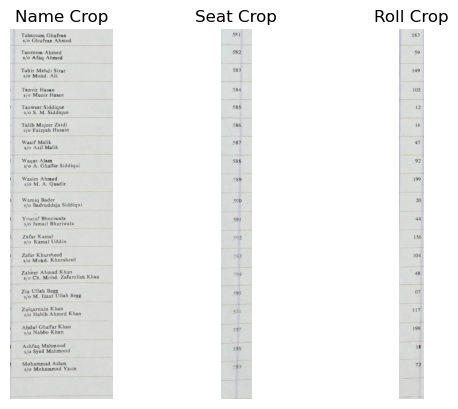

Written: Mechnical 9989 19 19 17
Data: [['Mechnical', '9989', '58 [', '163', 'Tabassum Ghufran s/o Ghufran Ahmed'], ['Mechnical', '9989', '582', '59', 'Tanzcem Ahmed s/o A faq Ahmed'], ['Mechnical', '9989', '583', '149', 'Tahir Mehdi Sizar s/o Mohd Ali'], ['Mechnical', '9989', '584', '105', 'Tanvir Hasan /o Munir Hasan'], ['Mechnical', '9989', '585', '12', 'Tanweer Siddique s/o S: M. Siddique'], ['Mechnical', '9989', '586', '16', 'Talib Mujeer Zaidi s/o Faizyab Husain'], ['Mechnical', '9989', '587', '92', 'Wasif Malik s/o Asif Malik'], ['Mechnical', '9989', '588', '199', 'Waqar Alam s/0 A. Ghaflar Siddiqui'], ['Mechnical', '9989', '289', '20', 'Wasim Ahmed so M. A. Quadir'], ['Mechnical', '9989', 'Sc0', '156', 'Wamiq Bader s/o Badruddaja Siddiqui'], ['Mechnical', '9989', '59|', '104', 'Yousuf Bhuriwala s/o Ismail Bhuriwala'], ['Mechnical', '9989', '592', '48', 'Zafar Kamal s/o Kama] Uddin'], ['Mechnical', '9989', '593', '07', 'Zafar Khursheed s/o Mobd. Khursheed'], ['Mechnical', '9989'

In [16]:
path = r"C:\Users\hpcc\Desktop\OCR\source"
dir_list = os.listdir(path)

for item in dir_list:
    item_path = os.path.join(path, item)
    
    if os.path.isdir(item_path):  # Check if item is a directory
        files = os.listdir(item_path)
        
        for file in files:
            file_path = os.path.join(item_path, file)
            #print(path, item, file)
            data = ocr1(path, item, file)  # Assuming ocr() is defined and implemented correctly
            if data:
                print("Data:", data)  # Print the data for debugging
                #csv_writter1(data)  # Assuming csv_writer() is defined and implemented correctly
